In [1]:
import nltk
import spacy
import numpy as np
import pandas as pd
import re

In [2]:
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('europarl_raw')
nltk.download('gutenberg')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/adanik/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /home/adanik/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package stopwords to /home/adanik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/adanik/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package europarl_raw to
[nltk_data]     /home/adanik/nltk_data...
[nltk_data]   Package europarl_raw is already up-to-date!
[nltk_data] Downloading package gutenberg to /home/adanik/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package wordnet to /home/adanik/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
#!python -m spacy download en_core_web_sm

* [1. Shallow parsing](#1) <br/>
* [2. Dependency Grammar](#2) <br/>

<a id='1'></a>
# Shallow parsing

In [4]:
nlp = spacy.load("en_core_web_sm", parse=True, tag=True, entity=True)

In [4]:
sentence = "The brown fox is quick and he is jumping over the lazy dog"

In [5]:
pos_tags = nltk.pos_tag(sentence.split())
pd.DataFrame(pos_tags).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,The,brown,fox,is,quick,and,he,is,jumping,over,the,lazy,dog
1,DT,JJ,NN,VBZ,JJ,CC,PRP,VBZ,VBG,IN,DT,JJ,NN


In [6]:
spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in nlp(sentence)]
pd.DataFrame(spacy_pos_tagged).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,The,brown,fox,is,quick,and,he,is,jumping,over,the,lazy,dog
1,DT,JJ,NN,VBZ,JJ,CC,PRP,VBZ,VBG,IN,DT,JJ,NN
2,DET,ADJ,NOUN,AUX,ADJ,CCONJ,PRON,AUX,VERB,ADP,DET,ADJ,NOUN


In [7]:
grammar = '''
            NP: {<DT>?<JJ>?<NN.*>}
            ADJP: {<JJ>}
            ADVP: {<RB.*>}
            PP: {<IN>}
            VP: {<MD>?<VB.*>+}
          '''
pos_tagged_sent = nltk.pos_tag(sentence.split())
rp = nltk.RegexpParser(grammar)
shallow_parsed_sent = rp.parse(pos_tagged_sent)
print(shallow_parsed_sent)

(S
  (NP The/DT brown/JJ fox/NN)
  (VP is/VBZ)
  (ADJP quick/JJ)
  and/CC
  he/PRP
  (VP is/VBZ jumping/VBG)
  (PP over/IN)
  (NP the/DT lazy/JJ dog/NN))



# Dependency Grammar

In [8]:
from spacy import displacy
displacy.render(nlp(sentence), jupyter=True,
                options={'distance': 100,
                         'arrow_stroke': 1.5,
                         'arrow_width': 8})

# Constituency Grammar

https://nlp.stanford.edu/software/lex-parser.shtml

In [9]:
from nltk.parse.stanford import StanfordParser
scp = StanfordParser(path_to_jar='/home/adanik/Downloads/stanford-parser-4.0.0/stanford-parser.jar',
                     path_to_models_jar='/home/adanik/Downloads/stanford-parser-4.0.0/stanford-parser-4.0.0-models.jar')
result = list(scp.raw_parse(sentence))
print(result[0])

<ipython-input-9-f05e29247a61>:2: DeprecationWarning: The StanfordParser will be deprecated
Please use nltk.parse.corenlp.CoreNLPParser instead.
  scp = StanfordParser(path_to_jar='/home/adanik/Downloads/stanford-parser-4.0.0/stanford-parser.jar',


(ROOT
  (S
    (S
      (NP (DT The) (JJ brown) (NN fox))
      (VP (VBZ is) (ADJP (JJ quick))))
    (CC and)
    (S
      (NP (PRP he))
      (VP
        (VBZ is)
        (VP
          (VBG jumping)
          (PP (IN over) (NP (DT the) (JJ lazy) (NN dog))))))))


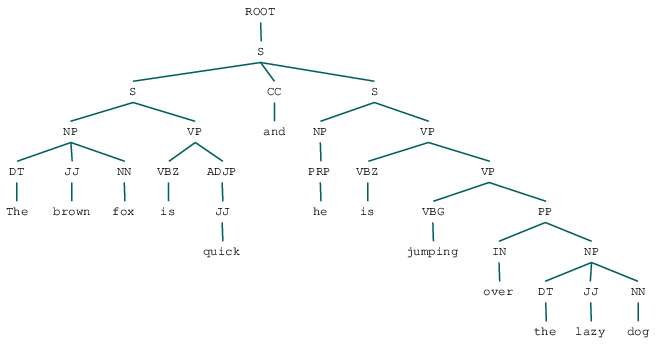

In [10]:
# visualize constituency tree
result[0]

<a id='4'></a>
# Lexical Semantic Relations

In [11]:
url = "https://raw.githubusercontent.com/teropa/nlp/master/resources/corpora/gutenberg/bible-kjv.txt"

In [12]:
from nltk.corpus import gutenberg
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
bible = gutenberg.open('bible-kjv.txt')
bible = bible.readlines()
bible[:5]

['[The King James Bible]\n',
 '\n',
 'The Old Testament of the King James Bible\n',
 '\n',
 'The First Book of Moses:  Called Genesis\n']

In [14]:
len(bible)

99805

In [15]:
bible = list(filter(None, [item.strip('\n') for item in bible]))
bible[:5]

['[The King James Bible]',
 'The Old Testament of the King James Bible',
 'The First Book of Moses:  Called Genesis',
 '1:1 In the beginning God created the heaven and the earth.',
 '1:2 And the earth was without form, and void; and darkness was upon']

In [16]:
len(bible)

74645

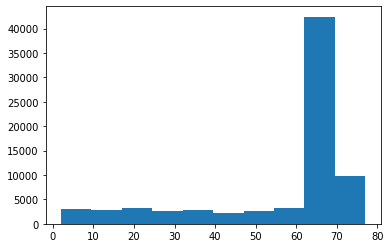

In [17]:
line_lengths = [len(sentence) for sentence in bible]
h = plt.hist(line_lengths)

In [18]:
tokens = [item.split() for item in bible]
print(tokens[:5])

[['[The', 'King', 'James', 'Bible]'], ['The', 'Old', 'Testament', 'of', 'the', 'King', 'James', 'Bible'], ['The', 'First', 'Book', 'of', 'Moses:', 'Called', 'Genesis'], ['1:1', 'In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth.'], ['1:2', 'And', 'the', 'earth', 'was', 'without', 'form,', 'and', 'void;', 'and', 'darkness', 'was', 'upon']]


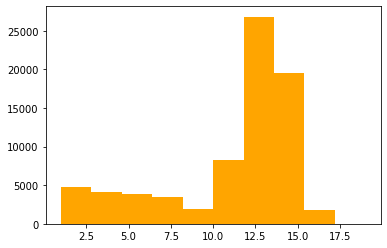

In [19]:
total_tokens_per_line = [len(sentence.split()) for sentence in bible]
h = plt.hist(total_tokens_per_line, color='orange')

In [20]:
words = [word for sentence in tokens for word in sentence]
print(words[:20])

['[The', 'King', 'James', 'Bible]', 'The', 'Old', 'Testament', 'of', 'the', 'King', 'James', 'Bible', 'The', 'First', 'Book', 'of', 'Moses:', 'Called', 'Genesis', '1:1']


In [21]:
words = list(filter(None, [re.sub(r'[^A-Za-z]', '', word) for word in words]))
print(words[:20])

['The', 'King', 'James', 'Bible', 'The', 'Old', 'Testament', 'of', 'the', 'King', 'James', 'Bible', 'The', 'First', 'Book', 'of', 'Moses', 'Called', 'Genesis', 'In']


In [22]:
from collections import Counter

In [23]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
words = [word.lower() for word in words if word.lower() not in stopwords]
Counter(words).most_common(10)

[('shall', 9838),
 ('unto', 8997),
 ('lord', 7830),
 ('thou', 5474),
 ('thy', 4600),
 ('god', 4442),
 ('said', 3999),
 ('ye', 3983),
 ('thee', 3826),
 ('upon', 2748)]

<a id='5'></a>
# Removing HTML Tags

In [24]:
import requests
data = requests.get('http://www.gutenberg.org/cache/epub/8001/pg8001.html')
content = data.content
print(content[1163:2200])

b'a name="generator" content="Ebookmaker 0.9.5 by Project Gutenberg"/>\r\n</head>\r\n  <body><p id="id00000">Project Gutenberg EBook The Bible, King James, Book 1: Genesis</p>\r\n\r\n<p id="id00001">Copyright laws are changing all over the world. Be sure to check the\r\ncopyright laws for your country before downloading or redistributing\r\nthis or any other Project Gutenberg eBook.</p>\r\n\r\n<p id="id00002">This header should be the first thing seen when viewing this Project\r\nGutenberg file.  Please do not remove it.  Do not change or edit the\r\nheader without written permission.</p>\r\n\r\n<p id="id00003">Please read the "legal small print," and other information about the\r\neBook and Project Gutenberg at the bottom of this file.  Included is\r\nimportant information about your specific rights and restrictions in\r\nhow the file may be used.  You can also find out about how to make a\r\ndonation to Project Gutenberg, and how to get involved.</p>\r\n\r\n<p id="id00004" style="mar

In [25]:
import re
from bs4 import BeautifulSoup

In [26]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    [s.extract() for s in soup(['iframe', 'script'])]
    stripped_text = soup.get_text()
    stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
    return stripped_text

In [27]:
clean_content = strip_html_tags(content)
print(clean_content[1163:2045])

*** START OF THE PROJECT GUTENBERG EBOOK, THE BIBLE, KING JAMES, BOOK 1***
This eBook was produced by David Widger
with the help of Derek Andrew's text from January 1992
and the work of Bryan Taylor in November 2002.
Book 01        Genesis
01:001:001 In the beginning God created the heaven and the earth.
01:001:002 And the earth was without form, and void; and darkness was
           upon the face of the deep. And the Spirit of God moved upon
           the face of the waters.
01:001:003 And God said, Let there be light: and there was light.
01:001:004 And God saw the light, that it was good: and God divided the
           light from the darkness.
01:001:005 And God called the light Day, and the darkness he called
           Night. And the evening and the morning were the first day.
01:001:006 And God said, Let there be a firmament in the midst of the
           waters,


In [28]:
import nltk
from nltk.corpus import gutenberg
from pprint import pprint
import numpy as np

In [29]:
# loading text corpora
alice = gutenberg.raw(fileids='carroll-alice.txt')
sample_text = ("US unveils world's most powerful supercomputer, beats China. "
               "The US has unveiled the world's most powerful supercomputer called 'Summit', "
               "beating the previous record-holder China's Sunway TaihuLight. With a peak performance "
               "of 200,000 trillion calculations per second, it is over twice as fast as Sunway TaihuLight, "
               "which is capable of 93,000 trillion calculations per second. Summit has 4,608 servers, "
               "which reportedly take up the size of two tennis courts.")
sample_text

"US unveils world's most powerful supercomputer, beats China. The US has unveiled the world's most powerful supercomputer called 'Summit', beating the previous record-holder China's Sunway TaihuLight. With a peak performance of 200,000 trillion calculations per second, it is over twice as fast as Sunway TaihuLight, which is capable of 93,000 trillion calculations per second. Summit has 4,608 servers, which reportedly take up the size of two tennis courts."

In [30]:
# Total characters in Alice in Wonderland
len(alice)

144395

In [31]:
default_st = nltk.sent_tokenize
alice_sentences = default_st(text=alice)
sample_sentences = default_st(text=sample_text)
print('Total sentences in sample_text:', len(sample_sentences))
print('Sample text sentences :-')
print(np.array(sample_sentences))
print('\nTotal sentences in alice:', len(alice_sentences))
print('First 5 sentences in alice:-')
print(np.array(alice_sentences[0:5]))

Total sentences in sample_text: 4
Sample text sentences :-
["US unveils world's most powerful supercomputer, beats China."
 "The US has unveiled the world's most powerful supercomputer called 'Summit', beating the previous record-holder China's Sunway TaihuLight."
 'With a peak performance of 200,000 trillion calculations per second, it is over twice as fast as Sunway TaihuLight, which is capable of 93,000 trillion calculations per second.'
 'Summit has 4,608 servers, which reportedly take up the size of two tennis courts.']

Total sentences in alice: 1625
First 5 sentences in alice:-
["[Alice's Adventures in Wonderland by Lewis Carroll 1865]\n\nCHAPTER I."
 "Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, 'and what is the use of a book,' thought Alice 'without pictures or\nconversation?'"
 

In [32]:
from nltk.corpus import europarl_raw
german_text = europarl_raw.german.raw(fileids='ep-00-01-17.de')
# Total characters in the corpus
print(len(german_text))
# First 100 characters in the corpus
print(german_text[0:100])

157171
 
Wiederaufnahme der Sitzungsperiode Ich erkläre die am Freitag , dem 17. Dezember unterbrochene Sit


In [33]:
# default sentence tokenizer
german_sentences_def = default_st(text=german_text, language='german')
# loading german text tokenizer into a PunktSentenceTokenizer instance
german_tokenizer = nltk.data.load(resource_url='tokenizers/punkt/german.pickle')
german_sentences = german_tokenizer.tokenize(german_text)

In [34]:
# verify the type of german_tokenizer
# should be PunktSentenceTokenizer
print(type(german_tokenizer))

# check if results of both tokenizers match
# should be True
print(german_sentences_def == german_sentences)

<class 'nltk.tokenize.punkt.PunktSentenceTokenizer'>
True


In [35]:
# print first 5 sentences of the corpus
print(np.array(german_sentences[:5]))

[' \nWiederaufnahme der Sitzungsperiode Ich erkläre die am Freitag , dem 17. Dezember unterbrochene Sitzungsperiode des Europäischen Parlaments für wiederaufgenommen , wünsche Ihnen nochmals alles Gute zum Jahreswechsel und hoffe , daß Sie schöne Ferien hatten .'
 'Wie Sie feststellen konnten , ist der gefürchtete " Millenium-Bug " nicht eingetreten .'
 'Doch sind Bürger einiger unserer Mitgliedstaaten Opfer von schrecklichen Naturkatastrophen geworden .'
 'Im Parlament besteht der Wunsch nach einer Aussprache im Verlauf dieser Sitzungsperiode in den nächsten Tagen .'
 'Heute möchte ich Sie bitten - das ist auch der Wunsch einiger Kolleginnen und Kollegen - , allen Opfern der Stürme , insbesondere in den verschiedenen Ländern der Europäischen Union , in einer Schweigeminute zu gedenken .']


In [36]:
punkt_st = nltk.tokenize.PunktSentenceTokenizer()
sample_sentences = punkt_st.tokenize(sample_text)
print(np.array(sample_sentences))

["US unveils world's most powerful supercomputer, beats China."
 "The US has unveiled the world's most powerful supercomputer called 'Summit', beating the previous record-holder China's Sunway TaihuLight."
 'With a peak performance of 200,000 trillion calculations per second, it is over twice as fast as Sunway TaihuLight, which is capable of 93,000 trillion calculations per second.'
 'Summit has 4,608 servers, which reportedly take up the size of two tennis courts.']


In [37]:
SENTENCE_TOKENS_PATTERN = r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<![A-Z]\.)(?<=\.|\?|\!)\s'
regex_st = nltk.tokenize.RegexpTokenizer(
            pattern=SENTENCE_TOKENS_PATTERN,
            gaps=True)
sample_sentences = regex_st.tokenize(sample_text)
print(np.array(sample_sentences))

["US unveils world's most powerful supercomputer, beats China."
 "The US has unveiled the world's most powerful supercomputer called 'Summit', beating the previous record-holder China's Sunway TaihuLight."
 'With a peak performance of 200,000 trillion calculations per second, it is over twice as fast as Sunway TaihuLight, which is capable of 93,000 trillion calculations per second.'
 'Summit has 4,608 servers, which reportedly take up the size of two tennis courts.']


<a id='6'></a>
# Word Tokenization

In [38]:
default_wt = nltk.word_tokenize
words = default_wt(sample_text)
np.array(words)

array(['US', 'unveils', 'world', "'s", 'most', 'powerful',
       'supercomputer', ',', 'beats', 'China', '.', 'The', 'US', 'has',
       'unveiled', 'the', 'world', "'s", 'most', 'powerful',
       'supercomputer', 'called', "'Summit", "'", ',', 'beating', 'the',
       'previous', 'record-holder', 'China', "'s", 'Sunway', 'TaihuLight',
       '.', 'With', 'a', 'peak', 'performance', 'of', '200,000',
       'trillion', 'calculations', 'per', 'second', ',', 'it', 'is',
       'over', 'twice', 'as', 'fast', 'as', 'Sunway', 'TaihuLight', ',',
       'which', 'is', 'capable', 'of', '93,000', 'trillion',
       'calculations', 'per', 'second', '.', 'Summit', 'has', '4,608',
       'servers', ',', 'which', 'reportedly', 'take', 'up', 'the', 'size',
       'of', 'two', 'tennis', 'courts', '.'], dtype='<U13')

In [39]:
treebank_wt = nltk.TreebankWordTokenizer()
words = treebank_wt.tokenize(sample_text)
np.array(words)

array(['US', 'unveils', 'world', "'s", 'most', 'powerful',
       'supercomputer', ',', 'beats', 'China.', 'The', 'US', 'has',
       'unveiled', 'the', 'world', "'s", 'most', 'powerful',
       'supercomputer', 'called', "'Summit", "'", ',', 'beating', 'the',
       'previous', 'record-holder', 'China', "'s", 'Sunway',
       'TaihuLight.', 'With', 'a', 'peak', 'performance', 'of', '200,000',
       'trillion', 'calculations', 'per', 'second', ',', 'it', 'is',
       'over', 'twice', 'as', 'fast', 'as', 'Sunway', 'TaihuLight', ',',
       'which', 'is', 'capable', 'of', '93,000', 'trillion',
       'calculations', 'per', 'second.', 'Summit', 'has', '4,608',
       'servers', ',', 'which', 'reportedly', 'take', 'up', 'the', 'size',
       'of', 'two', 'tennis', 'courts', '.'], dtype='<U13')

In [40]:
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()
words = tokenizer.tokenize(sample_text)
np.array(words)

array(['US', 'unveils', 'world', "'", 's', 'most', 'powerful',
       'supercomputer', ',', 'beats', 'China.', 'The', 'US', 'has',
       'unveiled', 'the', 'world', "'", 's', 'most', 'powerful',
       'supercomputer', 'called', "'", 'Summit', "'", ',', 'beating',
       'the', 'previous', 'record-holder', 'China', "'", 's', 'Sunway',
       'TaihuLight.', 'With', 'a', 'peak', 'performance', 'of', '200,000',
       'trillion', 'calculations', 'per', 'second', ',', 'it', 'is',
       'over', 'twice', 'as', 'fast', 'as', 'Sunway', 'TaihuLight', ',',
       'which', 'is', 'capable', 'of', '93,000', 'trillion',
       'calculations', 'per', 'second.', 'Summit', 'has', '4,608',
       'servers', ',', 'which', 'reportedly', 'take', 'up', 'the', 'size',
       'of', 'two', 'tennis', 'courts', '.'], dtype='<U13')

In [41]:
# pattern to identify tokens themselves
TOKEN_PATTERN = r'\w+'
regex_wt = nltk.RegexpTokenizer(pattern=TOKEN_PATTERN,
                                gaps=False)
words = regex_wt.tokenize(sample_text)
np.array(words)

array(['US', 'unveils', 'world', 's', 'most', 'powerful', 'supercomputer',
       'beats', 'China', 'The', 'US', 'has', 'unveiled', 'the', 'world',
       's', 'most', 'powerful', 'supercomputer', 'called', 'Summit',
       'beating', 'the', 'previous', 'record', 'holder', 'China', 's',
       'Sunway', 'TaihuLight', 'With', 'a', 'peak', 'performance', 'of',
       '200', '000', 'trillion', 'calculations', 'per', 'second', 'it',
       'is', 'over', 'twice', 'as', 'fast', 'as', 'Sunway', 'TaihuLight',
       'which', 'is', 'capable', 'of', '93', '000', 'trillion',
       'calculations', 'per', 'second', 'Summit', 'has', '4', '608',
       'servers', 'which', 'reportedly', 'take', 'up', 'the', 'size',
       'of', 'two', 'tennis', 'courts'], dtype='<U13')

In [42]:
# pattern to identify tokens by using gaps between tokens
GAP_PATTERN = r'\s+'
regex_wt = nltk.RegexpTokenizer(pattern=GAP_PATTERN,
                                gaps=True)
words = regex_wt.tokenize(sample_text)
np.array(words)

array(['US', 'unveils', "world's", 'most', 'powerful', 'supercomputer,',
       'beats', 'China.', 'The', 'US', 'has', 'unveiled', 'the',
       "world's", 'most', 'powerful', 'supercomputer', 'called',
       "'Summit',", 'beating', 'the', 'previous', 'record-holder',
       "China's", 'Sunway', 'TaihuLight.', 'With', 'a', 'peak',
       'performance', 'of', '200,000', 'trillion', 'calculations', 'per',
       'second,', 'it', 'is', 'over', 'twice', 'as', 'fast', 'as',
       'Sunway', 'TaihuLight,', 'which', 'is', 'capable', 'of', '93,000',
       'trillion', 'calculations', 'per', 'second.', 'Summit', 'has',
       '4,608', 'servers,', 'which', 'reportedly', 'take', 'up', 'the',
       'size', 'of', 'two', 'tennis', 'courts.'], dtype='<U14')

In [43]:
word_indices = list(regex_wt.span_tokenize(sample_text))
print(word_indices)
print(np.array([sample_text[start:end] for start, end in word_indices]))

[(0, 2), (3, 10), (11, 18), (19, 23), (24, 32), (33, 47), (48, 53), (54, 60), (61, 64), (65, 67), (68, 71), (72, 80), (81, 84), (85, 92), (93, 97), (98, 106), (107, 120), (121, 127), (128, 137), (138, 145), (146, 149), (150, 158), (159, 172), (173, 180), (181, 187), (188, 199), (200, 204), (205, 206), (207, 211), (212, 223), (224, 226), (227, 234), (235, 243), (244, 256), (257, 260), (261, 268), (269, 271), (272, 274), (275, 279), (280, 285), (286, 288), (289, 293), (294, 296), (297, 303), (304, 315), (316, 321), (322, 324), (325, 332), (333, 335), (336, 342), (343, 351), (352, 364), (365, 368), (369, 376), (377, 383), (384, 387), (388, 393), (394, 402), (403, 408), (409, 419), (420, 424), (425, 427), (428, 431), (432, 436), (437, 439), (440, 443), (444, 450), (451, 458)]
['US' 'unveils' "world's" 'most' 'powerful' 'supercomputer,' 'beats'
 'China.' 'The' 'US' 'has' 'unveiled' 'the' "world's" 'most' 'powerful'
 'supercomputer' 'called' "'Summit'," 'beating' 'the' 'previous'
 'record-ho

In [44]:
wordpunkt_wt = nltk.WordPunctTokenizer()
words = wordpunkt_wt.tokenize(sample_text)
np.array(words)

array(['US', 'unveils', 'world', "'", 's', 'most', 'powerful',
       'supercomputer', ',', 'beats', 'China', '.', 'The', 'US', 'has',
       'unveiled', 'the', 'world', "'", 's', 'most', 'powerful',
       'supercomputer', 'called', "'", 'Summit', "',", 'beating', 'the',
       'previous', 'record', '-', 'holder', 'China', "'", 's', 'Sunway',
       'TaihuLight', '.', 'With', 'a', 'peak', 'performance', 'of', '200',
       ',', '000', 'trillion', 'calculations', 'per', 'second', ',', 'it',
       'is', 'over', 'twice', 'as', 'fast', 'as', 'Sunway', 'TaihuLight',
       ',', 'which', 'is', 'capable', 'of', '93', ',', '000', 'trillion',
       'calculations', 'per', 'second', '.', 'Summit', 'has', '4', ',',
       '608', 'servers', ',', 'which', 'reportedly', 'take', 'up', 'the',
       'size', 'of', 'two', 'tennis', 'courts', '.'], dtype='<U13')

In [45]:
whitespace_wt = nltk.WhitespaceTokenizer()
words = whitespace_wt.tokenize(sample_text)
np.array(words)

array(['US', 'unveils', "world's", 'most', 'powerful', 'supercomputer,',
       'beats', 'China.', 'The', 'US', 'has', 'unveiled', 'the',
       "world's", 'most', 'powerful', 'supercomputer', 'called',
       "'Summit',", 'beating', 'the', 'previous', 'record-holder',
       "China's", 'Sunway', 'TaihuLight.', 'With', 'a', 'peak',
       'performance', 'of', '200,000', 'trillion', 'calculations', 'per',
       'second,', 'it', 'is', 'over', 'twice', 'as', 'fast', 'as',
       'Sunway', 'TaihuLight,', 'which', 'is', 'capable', 'of', '93,000',
       'trillion', 'calculations', 'per', 'second.', 'Summit', 'has',
       '4,608', 'servers,', 'which', 'reportedly', 'take', 'up', 'the',
       'size', 'of', 'two', 'tennis', 'courts.'], dtype='<U14')

In [46]:
def tokenize_text(text):
    sentences = nltk.sent_tokenize(text)
    word_tokens = [nltk.word_tokenize(sentence) for sentence in sentences]
    return word_tokens

In [47]:
sents = tokenize_text(sample_text)
np.array(sents)

array([list(['US', 'unveils', 'world', "'s", 'most', 'powerful', 'supercomputer', ',', 'beats', 'China', '.']),
       list(['The', 'US', 'has', 'unveiled', 'the', 'world', "'s", 'most', 'powerful', 'supercomputer', 'called', "'Summit", "'", ',', 'beating', 'the', 'previous', 'record-holder', 'China', "'s", 'Sunway', 'TaihuLight', '.']),
       list(['With', 'a', 'peak', 'performance', 'of', '200,000', 'trillion', 'calculations', 'per', 'second', ',', 'it', 'is', 'over', 'twice', 'as', 'fast', 'as', 'Sunway', 'TaihuLight', ',', 'which', 'is', 'capable', 'of', '93,000', 'trillion', 'calculations', 'per', 'second', '.']),
       list(['Summit', 'has', '4,608', 'servers', ',', 'which', 'reportedly', 'take', 'up', 'the', 'size', 'of', 'two', 'tennis', 'courts', '.'])],
      dtype=object)

In [48]:
words = [word for sentence in sents for word in sentence]
np.array(words)

array(['US', 'unveils', 'world', "'s", 'most', 'powerful',
       'supercomputer', ',', 'beats', 'China', '.', 'The', 'US', 'has',
       'unveiled', 'the', 'world', "'s", 'most', 'powerful',
       'supercomputer', 'called', "'Summit", "'", ',', 'beating', 'the',
       'previous', 'record-holder', 'China', "'s", 'Sunway', 'TaihuLight',
       '.', 'With', 'a', 'peak', 'performance', 'of', '200,000',
       'trillion', 'calculations', 'per', 'second', ',', 'it', 'is',
       'over', 'twice', 'as', 'fast', 'as', 'Sunway', 'TaihuLight', ',',
       'which', 'is', 'capable', 'of', '93,000', 'trillion',
       'calculations', 'per', 'second', '.', 'Summit', 'has', '4,608',
       'servers', ',', 'which', 'reportedly', 'take', 'up', 'the', 'size',
       'of', 'two', 'tennis', 'courts', '.'], dtype='<U13')

In [49]:
import spacy
nlp = spacy.load('en_core_web_sm', parse = True, tag=True, entity=True)
text_spacy = nlp(sample_text)
sents = np.array(list(text_spacy.sents))
sents

array([US unveils world's most powerful supercomputer, beats China.,
       The US has unveiled the world's most powerful supercomputer called 'Summit', beating the previous record-holder China's Sunway TaihuLight.,
       With a peak performance of 200,000 trillion calculations per second, it is over twice as fast as Sunway TaihuLight, which is capable of 93,000 trillion calculations per second.,
       Summit has 4,608 servers, which reportedly take up the size of two tennis courts.],
      dtype=object)

In [50]:
sent_words = [[word.text for word in sent] for sent in sents]
np.array(sent_words)

array([list(['US', 'unveils', 'world', "'s", 'most', 'powerful', 'supercomputer', ',', 'beats', 'China', '.']),
       list(['The', 'US', 'has', 'unveiled', 'the', 'world', "'s", 'most', 'powerful', 'supercomputer', 'called', "'", 'Summit', "'", ',', 'beating', 'the', 'previous', 'record', '-', 'holder', 'China', "'s", 'Sunway', 'TaihuLight', '.']),
       list(['With', 'a', 'peak', 'performance', 'of', '200,000', 'trillion', 'calculations', 'per', 'second', ',', 'it', 'is', 'over', 'twice', 'as', 'fast', 'as', 'Sunway', 'TaihuLight', ',', 'which', 'is', 'capable', 'of', '93,000', 'trillion', 'calculations', 'per', 'second', '.']),
       list(['Summit', 'has', '4,608', 'servers', ',', 'which', 'reportedly', 'take', 'up', 'the', 'size', 'of', 'two', 'tennis', 'courts', '.'])],
      dtype=object)

In [51]:
words = [word.text for word in text_spacy]
np.array(words)

array(['US', 'unveils', 'world', "'s", 'most', 'powerful',
       'supercomputer', ',', 'beats', 'China', '.', 'The', 'US', 'has',
       'unveiled', 'the', 'world', "'s", 'most', 'powerful',
       'supercomputer', 'called', "'", 'Summit', "'", ',', 'beating',
       'the', 'previous', 'record', '-', 'holder', 'China', "'s",
       'Sunway', 'TaihuLight', '.', 'With', 'a', 'peak', 'performance',
       'of', '200,000', 'trillion', 'calculations', 'per', 'second', ',',
       'it', 'is', 'over', 'twice', 'as', 'fast', 'as', 'Sunway',
       'TaihuLight', ',', 'which', 'is', 'capable', 'of', '93,000',
       'trillion', 'calculations', 'per', 'second', '.', 'Summit', 'has',
       '4,608', 'servers', ',', 'which', 'reportedly', 'take', 'up',
       'the', 'size', 'of', 'two', 'tennis', 'courts', '.'], dtype='<U13')

<a id='7'></a>
## Removing Accented Characters

In [52]:
import unicodedata
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text
remove_accented_chars('Sómě Áccěntěd těxt')

'Some Accented text'

<a id='8'></a>
## Expanding Contractions

In [53]:
from contractions import contractions_dict

In [54]:
CONTRACTION_MAP = contractions_dict

In [55]:
contractions_dict

{"ain't": 'are not',
 "aren't": 'are not',
 "can't": 'can not',
 "can't've": 'can not have',
 "'cause": 'because',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 "hadn't": 'had not',
 "hadn't've": 'had not have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he would',
 "he'd've": 'he would have',
 "he'll": 'he will',
 "he'll've": 'he will have',
 "he's": 'he is',
 "how'd": 'how did',
 "how're": 'how are',
 "how'd'y": 'how do you',
 "how'll": 'how will',
 "how's": 'how is',
 "I'd": 'I would',
 "I'd've": 'I would have',
 "I'll": 'I will',
 "I'll've": 'I will have',
 "I'm": 'I am',
 "I've": 'I have',
 "isn't": 'is not',
 "it'd": 'it would',
 "it'd've": 'it would have',
 "it'll": 'it will',
 "it'll've": 'it will have',
 "it's": 'it is',
 "let's": 'let us',
 "ma'am": 'madam',
 "mayn't": 'may not',
 "might've": 'might have',
 "mightn't": 'might not',
 "mightn't've": 'might no

In [56]:
import re
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())),
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

In [57]:
expand_contractions("Y'all can't expand contractions I'd think")

'You all can not expand contractions I would think'

In [58]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text
remove_special_characters("Well this was fun! What do you think? 123#@!",
                          remove_digits=True)

'Well this was fun What do you think '

In [59]:
# lowercase
text = 'The quick brown fox jumped over The Big Dog'
text.lower()

'the quick brown fox jumped over the big dog'

In [60]:
# uppercase
text.upper()

'THE QUICK BROWN FOX JUMPED OVER THE BIG DOG'

In [61]:
# title case
text.title()

'The Quick Brown Fox Jumped Over The Big Dog'

<a id='9'></a>
# Text Correction

In [62]:
old_word = 'finalllyyy'
repeat_pattern = re.compile(r'(\w*)(\w)\2(\w*)')
match_substitution = r'\1\2\3'
step = 1
while True:
    # remove one repeated character
    new_word = repeat_pattern.sub(match_substitution,
                                  old_word)
    if new_word != old_word:
        print('Step: {} Word: {}'.format(step, new_word))
        step += 1 # update step
        # update old word to last substituted state
        old_word = new_word
        continue
    else:
        print("Final word:", new_word)
        break

Step: 1 Word: finalllyy
Step: 2 Word: finallly
Step: 3 Word: finally
Step: 4 Word: finaly
Final word: finaly


In [63]:
from nltk.corpus import wordnet
old_word = 'finalllyyy'
repeat_pattern = re.compile(r'(\w*)(\w)\2(\w*)')
match_substitution = r'\1\2\3'
step = 1
while True:
    # check for semantically correct word
    if wordnet.synsets(old_word):
        print("Final correct word:", old_word)
        break
    # remove one repeated character
    new_word = repeat_pattern.sub(match_substitution,
                                  old_word)
    if new_word != old_word:
        print('Step: {} Word: {}'.format(step, new_word))
        step += 1 # update step
        # update old word to last substituted state
        old_word = new_word
        continue
    else:
        print("Final word:", new_word)
        break

Step: 1 Word: finalllyy
Step: 2 Word: finallly
Step: 3 Word: finally
Final correct word: finally


In [64]:
from nltk.corpus import wordnet
def remove_repeated_characters(tokens):
    repeat_pattern = re.compile(r'(\w*)(\w)\2(\w*)')
    match_substitution = r'\1\2\3'
    def replace(old_word):
        if wordnet.synsets(old_word):
            return old_word
        new_word = repeat_pattern.sub(match_substitution, old_word)
        return replace(new_word) if new_word != old_word else new_word
    correct_tokens = [replace(word) for word in tokens]
    return correct_tokens

In [65]:
sample_sentence = 'My schooool is realllllyyy amaaazingggg'
correct_tokens = remove_repeated_characters(nltk.word_tokenize(sample_sentence))
' '.join(correct_tokens)


'My school is really amazing'

In [66]:
import re, collections
def tokens(text):
    """
    Get all words from the corpus
    """
    return re.findall('[a-z]+', text.lower())
WORDS = tokens(open('big.txt').read())
WORD_COUNTS = collections.Counter(WORDS)
# top 10 words in corpus
WORD_COUNTS.most_common(10)

[('the', 80030),
 ('of', 40025),
 ('and', 38313),
 ('to', 28766),
 ('in', 22050),
 ('a', 21155),
 ('that', 12512),
 ('he', 12401),
 ('was', 11410),
 ('it', 10681)]

In [67]:
# http://norvig.com/spell-correct.html
import re
from collections import Counter

def words(text): 
    return re.findall(r'\w+', text.lower())

WORDS = Counter(words(open('big.txt').read()))

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / N

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [68]:
correction('korrectud')

'corrected'

In [69]:
correction('speling')

'spelling'

In [70]:
# input word
word = 'fianlly'
# zero edit distance from input word
edits1(word)

{'afianlly',
 'aianlly',
 'bfianlly',
 'bianlly',
 'cfianlly',
 'cianlly',
 'dfianlly',
 'dianlly',
 'efianlly',
 'eianlly',
 'faanlly',
 'faianlly',
 'fainlly',
 'fanlly',
 'fbanlly',
 'fbianlly',
 'fcanlly',
 'fcianlly',
 'fdanlly',
 'fdianlly',
 'feanlly',
 'feianlly',
 'ffanlly',
 'ffianlly',
 'fganlly',
 'fgianlly',
 'fhanlly',
 'fhianlly',
 'fiaally',
 'fiaanlly',
 'fiablly',
 'fiabnlly',
 'fiaclly',
 'fiacnlly',
 'fiadlly',
 'fiadnlly',
 'fiaelly',
 'fiaenlly',
 'fiaflly',
 'fiafnlly',
 'fiaglly',
 'fiagnlly',
 'fiahlly',
 'fiahnlly',
 'fiailly',
 'fiainlly',
 'fiajlly',
 'fiajnlly',
 'fiaklly',
 'fiaknlly',
 'fiallly',
 'fially',
 'fialnlly',
 'fialnly',
 'fiamlly',
 'fiamnlly',
 'fianally',
 'fianaly',
 'fianblly',
 'fianbly',
 'fianclly',
 'fiancly',
 'fiandlly',
 'fiandly',
 'fianelly',
 'fianely',
 'fianflly',
 'fianfly',
 'fianglly',
 'fiangly',
 'fianhlly',
 'fianhly',
 'fianilly',
 'fianily',
 'fianjlly',
 'fianjly',
 'fianklly',
 'fiankly',
 'fianlaly',
 'fianlay',
 'fi

In [71]:
# get correct words from above set
known(edits1(word))

{'finally'}

In [72]:
# two edit distances from input word
set(edits2(word))

{'uianley',
 'ficanylly',
 'fiqnllx',
 'fianlldyu',
 'fiaynclly',
 'jfianllky',
 'fiaznlkly',
 'franllyv',
 'pially',
 'fiaonlcy',
 'lfiantlly',
 'lianllqy',
 'finavnlly',
 'fignllyh',
 'fdiangly',
 'fesnlly',
 'fianslx',
 'faannlly',
 'zianllo',
 'fianllxuy',
 'fcianllqy',
 'fianqvy',
 'fsoianlly',
 'fidanlfy',
 'lcanlly',
 'fianliyg',
 'fizanklly',
 'fiazblly',
 'fiahllq',
 'fianllnyz',
 'fiaxllk',
 'fanllny',
 'fienllys',
 'nfivnlly',
 'fxyianlly',
 'fiawllf',
 'fiaillx',
 'wianklly',
 'fiagnllyf',
 'fqanlln',
 'fiacllj',
 'sfianlxy',
 'fmanllq',
 'fiinlluy',
 'fiatnllyu',
 'pinally',
 'fiaqnhlly',
 'rfianlhy',
 'fianlqjy',
 'sianllyu',
 'fimynlly',
 'wfianllty',
 'qffianlly',
 'fianlulyw',
 'fianlziy',
 'fianmllay',
 'rianily',
 'afianllyu',
 'fbanlljy',
 'fiinllyx',
 'fibntlly',
 'fianlqyc',
 'mianllym',
 'oianwly',
 'fianlxyn',
 'aiasnlly',
 'fiaxll',
 'faanlfly',
 'fganlmy',
 'fiaivly',
 'feantlly',
 'fianllsyl',
 'fibnlxly',
 'fitanlply',
 'fiaanluy',
 'fsanluly',
 'niamlly',
 

In [73]:
# get correct words from above set
known(edits2(word))

{'faintly', 'finally', 'finely', 'frankly'}

In [74]:
correction('FIANLLY')

'FIANLLY'

In [75]:
def correct_match(match):
    """
    Spell-correct word in match,
    and preserve proper upper/lower/title case.
    """
    word = match.group()
    def case_of(text):
        """
        Return the case-function appropriate
        for text: upper, lower, title, or just str.:
            """
        return (str.upper if text.isupper() else
                str.lower if text.islower() else
                str.title if text.istitle() else
                str)
    return case_of(word)(correction(word.lower()))
def correct_text_generic(text):
    """
    Correct all the words within a text,
    returning the corrected text.
    """
    return re.sub('[a-zA-Z]+', correct_match, text)

In [76]:
correct_text_generic('FIANLLY')

'FINALLY'

In [78]:
from textblob import Word
w = Word('fianlly')
w.correct()


'finally'

In [79]:
# check suggestions
w.spellcheck()
[('finally', 1.0)]
# another example
w = Word('flaot')
w.spellcheck()

[('flat', 0.85), ('float', 0.15)]

Besides this, there are several robust libraries available in Python, including
PyEnchant based on the enchant library (http://pythonhosted.org/pyenchant/),
autocorrect, which is available at https://github.com/phatpiglet/autocorrect/,
and aspell-­python, which is a Python wrapper around the popular GNU Aspell. With
the advent of deep learning, sequential models like RNNs and LSTMs coupled with
word embeddings often out-perform these traditional methods. I also recommend
readers take a look at DeepSpell, which is available at https://github.com/MajorTal/
DeepSpell. It leverages deep learning to build a spelling corrector. Feel free to check
them out and use them for correcting word spellings!

<a id='10'></a>
# Stemming

In [80]:
# Porter Stemmer
from nltk.stem import PorterStemmer
ps = PorterStemmer()
ps.stem('jumping'), ps.stem('jumps'), ps.stem('jumped')

('jump', 'jump', 'jump')

In [81]:
ps.stem('lying')

'lie'

In [82]:
ps.stem('strange')

'strang'

In [83]:
# Porter Stemmer
from nltk.stem import LancasterStemmer
ps = LancasterStemmer()
ps.stem('jumping'), ps.stem('jumps'), ps.stem('jumped')

('jump', 'jump', 'jump')

In [84]:
ps.stem('lying')

'lying'

In [85]:
ps.stem('strange')

'strange'

In [86]:
from nltk.stem import RegexpStemmer
rs = RegexpStemmer('ing$|s$|ed$', min=4)
rs.stem('jumping'), rs.stem('jumps'), rs.stem('jumped')

('jump', 'jump', 'jump')

In [87]:
rs.stem('lying')

'ly'

In [88]:
rs.stem('strange')

'strange'

In [89]:
from nltk.stem import SnowballStemmer
ss = SnowballStemmer("german")
print('Supported Languages:', SnowballStemmer.languages)

# stemming on German words
# autobahnen -> cars
# autobahn -> car
ss.stem('autobahnen')

Supported Languages: ('arabic', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'hungarian', 'italian', 'norwegian', 'porter', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish')


'autobahn'

In [90]:
# springen -> jumping
# spring -> jump
ss.stem('springen')

'spring'

In [91]:
from nltk.stem import SnowballStemmer
ss = SnowballStemmer('english')

In [92]:
ss.stem('jumping'), ss.stem('jumps'), ss.stem('jumped')

('jump', 'jump', 'jump')

In [93]:
ss.stem('lying')

'lie'

In [94]:
ss.stem('strange')

'strang'

In [95]:
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text
simple_stemmer("My system keeps crashing his crashed yesterday, ours crashes daily")

'My system keep crash hi crash yesterday, our crash daili'

<a id='11'></a>
# Lemmatization

In [96]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

In [97]:
# lemmatize nouns
print(wnl.lemmatize('cars', 'n'))
print(wnl.lemmatize('men', 'n'))

car
men


In [98]:
# lemmatize verbs
print(wnl.lemmatize('running', 'v'))
print(wnl.lemmatize('ate', 'v'))

run
eat


In [99]:
# lemmatize adjectives
print(wnl.lemmatize('saddest', 'a'))
print(wnl.lemmatize('fancier', 'a'))

sad
fancy


In [100]:
# ineffective lemmatization
print(wnl.lemmatize('ate', 'n'))
print(wnl.lemmatize('fancier', 'v'))

ate
fancier


In [101]:
import spacy
nlp = spacy.load('en_core_web_sm', parse=True, tag=True, entity=True)
text = 'My system keeps crashing his crashed yesterday, ours crashes daily'
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text
lemmatize_text("My system keeps crashing! his crashed yesterday, ours crashes daily")

'My system keep crash ! his crash yesterday , ours crash daily'

<a id='12'></a>
# Removing Stopwords

In [102]:
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
remove_stopwords("The, and, if are stopwords, computer is not")

', , stopwords , computer'

<a id='13'></a>
# Text Normalizer

In [103]:
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True,
                     text_lemmatization=True, special_char_removal=True,
                     stopword_removal=True, remove_digits=True):
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # expand contractions
        if contraction_expansion:
            doc = expand_contractions(doc)
        # lowercase the text
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits
        if special_char_removal:
            # insert spaces between special characters to isolate them
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
        normalized_corpus.append(doc)
    return normalized_corpus

In [104]:
{'Original': sample_text,
'Processed': normalize_corpus([sample_text])[0]}

{'Original': "US unveils world's most powerful supercomputer, beats China. The US has unveiled the world's most powerful supercomputer called 'Summit', beating the previous record-holder China's Sunway TaihuLight. With a peak performance of 200,000 trillion calculations per second, it is over twice as fast as Sunway TaihuLight, which is capable of 93,000 trillion calculations per second. Summit has 4,608 servers, which reportedly take up the size of two tennis courts.",
 'Processed': 'us unveil world powerful supercomputer beat china us unveil world powerful supercomputer call summit beat previous record holder china sunway taihulight peak performance trillion calculation per second twice fast sunway taihulight capable trillion calculation per second summit server reportedly take size two tennis court'}

# Text Syntax and Structure

In [105]:
import nltk
# download all dependencies and corpora
nltk.download('all', halt_on_error=False)
# OR use a GUI based downloader and select dependencies
#nltk.download()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/adanik/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/adanik/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /home/adanik/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /home/adanik/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /home/adanik/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /home/adanik/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package

[nltk_data]    |   Package timit is already up-to-date!
[nltk_data]    | Downloading package toolbox to
[nltk_data]    |     /home/adanik/nltk_data...
[nltk_data]    |   Package toolbox is already up-to-date!
[nltk_data]    | Downloading package treebank to
[nltk_data]    |     /home/adanik/nltk_data...
[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     /home/adanik/nltk_data...
[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to /home/adanik/nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     /home/adanik/nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     /home/adanik/nltk_data...
[nltk_data]    |   Package unicode_samples is already up-to-date!
[nltk_data]    | Downlo

True

In [120]:
!pip install pydot-ng
!pip install graphviz

In [106]:
sentence = "US unveils world's most powerful supercomputer, beats China."
import pandas as pd
import spacy
nlp = spacy.load('en_core_web_sm', parse=True, tag=True, entity=True)
sentence_nlp = nlp(sentence)
# POS tagging with Spacy
spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in sentence_nlp]
pd.DataFrame(spacy_pos_tagged, columns=['Word', 'POS tag', 'Tag type']).T

,0,1,2,3,4,5,6,7,8,9,10
Word,US,unveils,world,'s,most,powerful,supercomputer,",",beats,China,.
POS tag,NNP,VBZ,NN,POS,RBS,JJ,NN,",",VBZ,NNP,.
Tag type,PROPN,VERB,NOUN,PART,ADV,ADJ,NOUN,PUNCT,VERB,PROPN,PUNCT


In [107]:
# POS tagging with nltk
import nltk
nltk_pos_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
pd.DataFrame(nltk_pos_tagged, columns=['Word', 'POS tag']).T

,0,1,2,3,4,5,6,7,8,9,10
Word,US,unveils,world,'s,most,powerful,supercomputer,",",beats,China,.
POS tag,NNP,JJ,NN,POS,RBS,JJ,NN,",",VBZ,NNP,.


In [108]:
from nltk.corpus import treebank
data = treebank.tagged_sents()
train_data = data[:3500]
test_data = data[3500:]
print(train_data[0])

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')]


In [109]:
# default tagger
from nltk.tag import DefaultTagger
dt = DefaultTagger('NN')

In [110]:
# accuracy on test data
dt.evaluate(test_data)

0.1454158195372253

In [111]:
# tagging our sample headline
dt.tag(nltk.word_tokenize(sentence))

[('US', 'NN'),
 ('unveils', 'NN'),
 ('world', 'NN'),
 ("'s", 'NN'),
 ('most', 'NN'),
 ('powerful', 'NN'),
 ('supercomputer', 'NN'),
 (',', 'NN'),
 ('beats', 'NN'),
 ('China', 'NN'),
 ('.', 'NN')]

In [112]:
# regex tagger
from nltk.tag import RegexpTagger
# define regex tag patterns
patterns = [
        (r'.*ing$', 'VBG'),               #
        (r'.*ed$', 'VBD'),                #
        (r'.*es$', 'VBZ'),                #
        (r'.*ould$', 'MD'),               #
        (r'.*\'s$', 'NN$'),               #
        (r'.*s$', 'NNS'),                 #
        (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  #
        (r'.*', 'NN')                     #
]
rt = RegexpTagger(patterns)
# accuracy on test data
rt.evaluate(test_data)

0.24039113176493368

In [113]:
# tagging our sample headline
rt.tag(nltk.word_tokenize(sentence))

[('US', 'NN'),
 ('unveils', 'NNS'),
 ('world', 'NN'),
 ("'s", 'NN$'),
 ('most', 'NN'),
 ('powerful', 'NN'),
 ('supercomputer', 'NN'),
 (',', 'NN'),
 ('beats', 'NNS'),
 ('China', 'NN'),
 ('.', 'NN')]

In [114]:
## Ngram taggers
from nltk.tag import UnigramTagger
from nltk.tag import BigramTagger
from nltk.tag import TrigramTagger

ut = UnigramTagger(train_data)
bt = BigramTagger(train_data)
tt = TrigramTagger(train_data)
# testing performance of unigram tagger
print(ut.evaluate(test_data))
print(ut.tag(nltk.word_tokenize(sentence)))

0.8607803272340013
[('US', 'NNP'), ('unveils', None), ('world', 'NN'), ("'s", 'POS'), ('most', 'JJS'), ('powerful', 'JJ'), ('supercomputer', 'NN'), (',', ','), ('beats', None), ('China', 'NNP'), ('.', '.')]


In [115]:
# testing performance of bigram tagger
print(bt.evaluate(test_data))
print(bt.tag(nltk.word_tokenize(sentence)))

0.13466937748087907
[('US', None), ('unveils', None), ('world', None), ("'s", None), ('most', None), ('powerful', None), ('supercomputer', None), (',', None), ('beats', None), ('China', None), ('.', None)]


In [116]:
# testing performance of trigram tagger
print(tt.evaluate(test_data))
print(tt.tag(nltk.word_tokenize(sentence)))

0.08064672281924679
[('US', None), ('unveils', None), ('world', None), ("'s", None), ('most', None), ('powerful', None), ('supercomputer', None), (',', None), ('beats', None), ('China', None), ('.', None)]


In [117]:
def combined_tagger(train_data, taggers, backoff=None):
    for tagger in taggers:
        backoff = tagger(train_data, backoff=backoff)
    return backoff
ct = combined_tagger(train_data=train_data,
                     taggers=[UnigramTagger, BigramTagger, TrigramTagger],
                     backoff=rt)
# evaluating the new combined tagger with backoff taggers
print(ct.evaluate(test_data))
print(ct.tag(nltk.word_tokenize(sentence)))

0.9094781682641108
[('US', 'NNP'), ('unveils', 'NNS'), ('world', 'NN'), ("'s", 'POS'), ('most', 'RBS'), ('powerful', 'JJ'), ('supercomputer', 'NN'), (',', ','), ('beats', 'NNS'), ('China', 'NNP'), ('.', '.')]


In [118]:
from nltk.classify import NaiveBayesClassifier, MaxentClassifier
from nltk.tag.sequential import ClassifierBasedPOSTagger
nbt = ClassifierBasedPOSTagger(train=train_data,
                               classifier_builder=NaiveBayesClassifier.train)
# evaluate tagger on test data and sample sentence
print(nbt.evaluate(test_data))
print(nbt.tag(nltk.word_tokenize(sentence)))

0.9306806079969019
[('US', 'PRP'), ('unveils', 'VBZ'), ('world', 'VBN'), ("'s", 'POS'), ('most', 'JJS'), ('powerful', 'JJ'), ('supercomputer', 'NN'), (',', ','), ('beats', 'VBZ'), ('China', 'NNP'), ('.', '.')]


# Shallow Parsing or Chunking

In [119]:
from nltk.corpus import treebank_chunk
data = treebank_chunk.chunked_sents()
train_data = data[:3500]
test_data = data[3500:]

In [120]:
# view sample data
print(train_data[7])

(S
  (NP A/DT Lorillard/NNP spokewoman/NN)
  said/VBD
  ,/,
  ``/``
  (NP This/DT)
  is/VBZ
  (NP an/DT old/JJ story/NN)
  ./.)


In [121]:
from nltk.chunk import RegexpParser
# get POS tagged sentence
tagged_simple_sent = nltk.pos_tag(nltk.word_tokenize(sentence))
print('POS Tags:', tagged_simple_sent)
# illustrate NP chunking based on explicit chunk patterns
chunk_grammar = """
NP: {<DT>?<JJ>*<NN.*>}
"""
rc = RegexpParser(chunk_grammar)
c = rc.parse(tagged_simple_sent)
# print and view chunked sentence using chunking

POS Tags: [('US', 'NNP'), ('unveils', 'JJ'), ('world', 'NN'), ("'s", 'POS'), ('most', 'RBS'), ('powerful', 'JJ'), ('supercomputer', 'NN'), (',', ','), ('beats', 'VBZ'), ('China', 'NNP'), ('.', '.')]


In [122]:
print(c)

(S
  (NP US/NNP)
  (NP unveils/JJ world/NN)
  's/POS
  most/RBS
  (NP powerful/JJ supercomputer/NN)
  ,/,
  beats/VBZ
  (NP China/NNP)
  ./.)


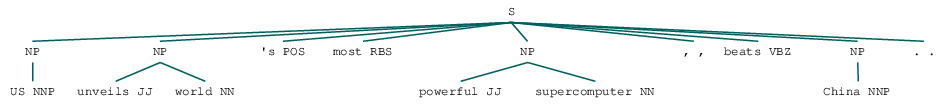

In [123]:
c

In [124]:
# illustrate NP chunking based on explicit chink patterns
chink_grammar = """
NP:
    {<.*>+}             # Chunk everything as NP
    }<VBZ|VBD|JJ|IN>+{  # Chink sequences of VBD\VBZ\JJ\IN
"""
rc = RegexpParser(chink_grammar)
c = rc.parse(tagged_simple_sent)
# print and view chunked sentence using chinking
print(c)


(S
  (NP US/NNP)
  unveils/JJ
  (NP world/NN 's/POS most/RBS)
  powerful/JJ
  (NP supercomputer/NN ,/,)
  beats/VBZ
  (NP China/NNP ./.))


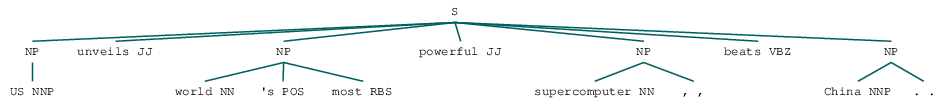

In [125]:
c

# Dependency Parser

In [126]:
dependency_pattern = '{left}<---{word}[{w_type}]--->{right}\n--------'
for token in sentence_nlp:
    print(dependency_pattern.format(word=token.orth_,
                                  w_type=token.dep_,
                                  left=[t.orth_ for t in token.lefts],
                                  right=[t.orth_ for t in token.rights]))

[]<---US[compound]--->[]
--------
['US']<---unveils[compound]--->[]
--------
['unveils']<---world[poss]--->["'s"]
--------
[]<---'s[case]--->[]
--------
[]<---most[advmod]--->[]
--------
['most']<---powerful[amod]--->[]
--------
['world', 'powerful']<---supercomputer[nsubj]--->[]
--------
[]<---,[punct]--->[]
--------
['supercomputer', ',']<---beats[ROOT]--->['China', '.']
--------
[]<---China[dobj]--->[]
--------
[]<---.[punct]--->[]
--------


In [127]:
from spacy import displacy
displacy.render(sentence_nlp, jupyter=True,
                options={'distance': 110,
                         'arrow_stroke': 2,
                         'arrow_width': 8})

In [128]:
from nltk.parse.stanford import StanfordDependencyParser
sdp = StanfordDependencyParser(path_to_jar='/home/adanik/Downloads/stanford-parser-4.0.0/stanford-parser.jar',
                     path_to_models_jar='/home/adanik/Downloads/stanford-parser-4.0.0/stanford-parser-4.0.0-models.jar')

<ipython-input-128-0061b9a3e3c7>:2: DeprecationWarning: The StanfordDependencyParser will be deprecated
Please use nltk.parse.corenlp.CoreNLPDependencyParser instead.
  sdp = StanfordDependencyParser(path_to_jar='/home/adanik/Downloads/stanford-parser-4.0.0/stanford-parser.jar',


In [129]:
# perform dependency parsing
result = list(sdp.raw_parse(sentence))[0]

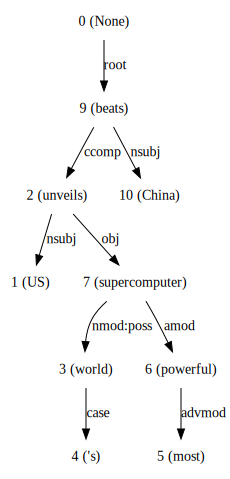

In [130]:
# generate annotated dependency parse tree
result

In [131]:
# generate dependency triples
[item for item in result.triples()]

[(('beats', 'VBZ'), 'ccomp', ('unveils', 'VBZ')),
 (('unveils', 'VBZ'), 'nsubj', ('US', 'NNP')),
 (('unveils', 'VBZ'), 'obj', ('supercomputer', 'NN')),
 (('supercomputer', 'NN'), 'nmod:poss', ('world', 'NN')),
 (('world', 'NN'), 'case', ("'s", 'POS')),
 (('supercomputer', 'NN'), 'amod', ('powerful', 'JJ')),
 (('powerful', 'JJ'), 'advmod', ('most', 'RBS')),
 (('beats', 'VBZ'), 'nsubj', ('China', 'NNP'))]

In [132]:
# print simple dependency parse tree
dep_tree = result.tree()
print(dep_tree)

(beats (unveils US (supercomputer (world 's) (powerful most))) China)


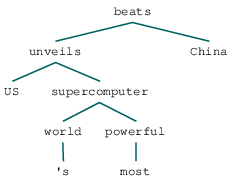

In [133]:
# visualize simple dependency parse tree
dep_tree


# Building a Text Corpus

In [134]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 200
%matplotlib inline

In [135]:
# building a corpus of documents
corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
          'I love green eggs, ham, sausages and bacon!',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!'
]
labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals',
'weather', 'animals']
corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus, 'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beautiful today,weather
7,The dog is lazy but the brown fox is quick!,animals


In [136]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')
def normalize_document(doc):
    # lowercase and remove special characters\whitespace
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc
normalize_corpus = np.vectorize(normalize_document)

In [137]:
norm_corpus = normalize_corpus(corpus)
norm_corpus

array(['sky blue beautiful', 'love blue beautiful sky',
       'quick brown fox jumps lazy dog',
       'kings breakfast sausages ham bacon eggs toast beans',
       'love green eggs ham sausages bacon',
       'brown fox quick blue dog lazy', 'sky blue sky beautiful today',
       'dog lazy brown fox quick'], dtype='<U51')

## Bag of Words Model

In [138]:
from sklearn.feature_extraction.text import CountVectorizer
# get bag of words features in sparse format
cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix

<8x20 sparse matrix of type '<class 'numpy.int64'>'
	with 42 stored elements in Compressed Sparse Row format>

In [139]:
# view non-zero feature positions in the sparse matrix
print(cv_matrix)

  (0, 17)	1
  (0, 3)	1
  (0, 2)	1
  (1, 17)	1
  (1, 3)	1
  (1, 2)	1
  (1, 14)	1
  (2, 15)	1
  (2, 5)	1
  (2, 8)	1
  (2, 11)	1
  (2, 13)	1
  (2, 6)	1
  (3, 12)	1
  (3, 4)	1
  (3, 16)	1
  (3, 10)	1
  (3, 0)	1
  (3, 7)	1
  (3, 18)	1
  (3, 1)	1
  (4, 14)	1
  (4, 16)	1
  (4, 10)	1
  (4, 0)	1
  (4, 7)	1
  (4, 9)	1
  (5, 3)	1
  (5, 15)	1
  (5, 5)	1
  (5, 8)	1
  (5, 13)	1
  (5, 6)	1
  (6, 17)	2
  (6, 3)	1
  (6, 2)	1
  (6, 19)	1
  (7, 15)	1
  (7, 5)	1
  (7, 8)	1
  (7, 13)	1
  (7, 6)	1


In [140]:
# view dense representation
# warning might give a memory error if data is too big
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]])

In [141]:
# get all unique words in the corpus
vocab = cv.get_feature_names()
# show document feature vectors
pd.DataFrame(cv_matrix, columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0
3,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0
5,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0
6,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1
7,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0


## Bag of N-Grams Model

In [142]:
# you can set the n-gram range to 1,2 to get unigrams as well as bigrams
bv = CountVectorizer(ngram_range=(2,2))
bv_matrix = bv.fit_transform(norm_corpus)
bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names()
pd.DataFrame(bv_matrix, columns=vocab)

,bacon eggs,beautiful sky,beautiful today,blue beautiful,blue dog,blue sky,breakfast sausages,brown fox,dog lazy,eggs ham,...,lazy dog,love blue,love green,quick blue,quick brown,sausages bacon,sausages ham,sky beautiful,sky blue,toast beans
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
7,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
from sklearn.feature_extraction.text import TfidfTransformer
tt = TfidfTransformer(norm='l2', use_idf=True)
tt_matrix = tt.fit_transform(cv_matrix)
tt_matrix = tt_matrix.toarray()
vocab = cv.get_feature_names()
pd.DataFrame(np.round(tt_matrix, 2), columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.00,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0
1,0.00,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.38,0.38,0.00,0.38,0.00,0.00,0.53,0.00,0.38,0.00,0.38,0.00,0.00,0.00,0.0
3,0.32,0.38,0.00,0.00,0.38,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.00,0.38,0.0
4,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.0
5,0.00,0.00,0.00,0.37,0.00,0.42,0.42,0.00,0.42,0.00,0.00,0.00,0.00,0.42,0.00,0.42,0.00,0.00,0.00,0.0
6,0.00,0.00,0.36,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.45,0.45,0.00,0.45,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.00,0.00,0.00,0.0


In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(min_df=0., max_df=1., norm='l2',
                     use_idf=True, smooth_idf=True)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()
vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.00,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0
1,0.00,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.38,0.38,0.00,0.38,0.00,0.00,0.53,0.00,0.38,0.00,0.38,0.00,0.00,0.00,0.0
3,0.32,0.38,0.00,0.00,0.38,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.00,0.38,0.0
4,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.0
5,0.00,0.00,0.00,0.37,0.00,0.42,0.42,0.00,0.42,0.00,0.00,0.00,0.00,0.42,0.00,0.42,0.00,0.00,0.00,0.0
6,0.00,0.00,0.36,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.45,0.45,0.00,0.45,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.00,0.00,0.00,0.0


In [145]:
# get unique words as feature names
unique_words = list(set([word for doc in [doc.split() for doc in norm_corpus] for word in doc]))
def_feature_dict = {w: 0 for w in unique_words}
print('Feature Names:', unique_words)
print('Default Feature Dict:', def_feature_dict)

Feature Names: ['lazy', 'ham', 'today', 'green', 'blue', 'toast', 'bacon', 'quick', 'kings', 'dog', 'brown', 'fox', 'beautiful', 'love', 'sky', 'breakfast', 'sausages', 'jumps', 'beans', 'eggs']
Default Feature Dict: {'lazy': 0, 'ham': 0, 'today': 0, 'green': 0, 'blue': 0, 'toast': 0, 'bacon': 0, 'quick': 0, 'kings': 0, 'dog': 0, 'brown': 0, 'fox': 0, 'beautiful': 0, 'love': 0, 'sky': 0, 'breakfast': 0, 'sausages': 0, 'jumps': 0, 'beans': 0, 'eggs': 0}


In [146]:
from collections import Counter
# build bag of words features for each document - term frequencies
bow_features = []
for doc in norm_corpus:
    bow_feature_doc = Counter(doc.split())
    all_features = Counter(def_feature_dict)
    bow_feature_doc.update(all_features)
    bow_features.append(bow_feature_doc)
bow_features = pd.DataFrame(bow_features)
bow_features

,sky,blue,beautiful,lazy,ham,today,green,toast,bacon,quick,kings,dog,brown,fox,love,breakfast,sausages,jumps,beans,eggs
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,0
3,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,1,0,1,1
4,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1
5,0,1,0,1,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0
6,2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0


In [147]:
import scipy.sparse as sp
feature_names = list(bow_features.columns)
# build the document frequency matrix
df = np.diff(sp.csc_matrix(bow_features, copy=True).indptr)
df = 1 + df # adding 1 to smoothen idf later
# show smoothened document frequencies
pd.DataFrame([df], columns=feature_names)

,sky,blue,beautiful,lazy,ham,today,green,toast,bacon,quick,kings,dog,brown,fox,love,breakfast,sausages,jumps,beans,eggs
0,4,5,4,4,3,2,2,2,3,4,2,4,4,4,3,2,3,2,2,3


In [148]:
# compute inverse document frequencies
total_docs = 1 + len(norm_corpus)
idf = 1.0 + np.log(float(total_docs) / df)
# show smoothened idfs
pd.DataFrame([np.round(idf, 2)], columns=feature_names)

,sky,blue,beautiful,lazy,ham,today,green,toast,bacon,quick,kings,dog,brown,fox,love,breakfast,sausages,jumps,beans,eggs
0,1.81,1.59,1.81,1.81,2.1,2.5,2.5,2.5,2.1,1.81,2.5,1.81,1.81,1.81,2.1,2.5,2.1,2.5,2.5,2.1


In [149]:
# compute idf diagonal matrix
total_features = bow_features.shape[1]
idf_diag = sp.spdiags(idf, diags=0, m=total_features, n=total_features)
idf_dense = idf_diag.todense()
# print the idf diagonal matrix
pd.DataFrame(np.round(idf_dense, 2))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.81,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00,1.59,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00,0.00,1.81,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,0.00,0.00,1.81,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00,0.00,0.00,0.00,2.1,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
5,0.00,0.00,0.00,0.00,0.0,2.5,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
6,0.00,0.00,0.00,0.00,0.0,0.0,2.5,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
7,0.00,0.00,0.00,0.00,0.0,0.0,0.0,2.5,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
8,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,2.1,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
9,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.81,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
# compute tfidf feature matrix
tf = np.array(bow_features, dtype='float64')
tfidf = tf * idf
# view raw tfidf feature matrix
pd.DataFrame(np.round(tfidf, 2), columns=feature_names)

,sky,blue,beautiful,lazy,ham,today,green,toast,bacon,quick,kings,dog,brown,fox,love,breakfast,sausages,jumps,beans,eggs
0,1.81,1.59,1.81,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,1.81,1.59,1.81,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,2.1,0.0,0.0,0.0,0.0,0.0
2,0.00,0.00,0.00,1.81,0.0,0.0,0.0,0.0,0.0,1.81,0.0,1.81,1.81,1.81,0.0,0.0,0.0,2.5,0.0,0.0
3,0.00,0.00,0.00,0.00,2.1,0.0,0.0,2.5,2.1,0.00,2.5,0.00,0.00,0.00,0.0,2.5,2.1,0.0,2.5,2.1
4,0.00,0.00,0.00,0.00,2.1,0.0,2.5,0.0,2.1,0.00,0.0,0.00,0.00,0.00,2.1,0.0,2.1,0.0,0.0,2.1
5,0.00,1.59,0.00,1.81,0.0,0.0,0.0,0.0,0.0,1.81,0.0,1.81,1.81,1.81,0.0,0.0,0.0,0.0,0.0,0.0
6,3.62,1.59,1.81,0.00,0.0,2.5,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
7,0.00,0.00,0.00,1.81,0.0,0.0,0.0,0.0,0.0,1.81,0.0,1.81,1.81,1.81,0.0,0.0,0.0,0.0,0.0,0.0


In [151]:
from numpy.linalg import norm
# compute L2 norms
norms = norm(tfidf, axis=1)
# print norms for each document
print (np.round(norms, 3))

# compute normalized tfidf
norm_tfidf = tfidf / norms[:, None]
# show final tfidf feature matrix
pd.DataFrame(np.round(norm_tfidf, 2), columns=feature_names)

[3.013 3.672 4.761 6.534 5.319 4.35  5.019 4.049]


,sky,blue,beautiful,lazy,ham,today,green,toast,bacon,quick,kings,dog,brown,fox,love,breakfast,sausages,jumps,beans,eggs
0,0.60,0.53,0.60,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.49,0.43,0.49,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.38,0.00,0.0,0.00,0.00,0.00,0.38,0.00,0.38,0.38,0.38,0.00,0.00,0.00,0.53,0.00,0.00
3,0.00,0.00,0.00,0.00,0.32,0.0,0.00,0.38,0.32,0.00,0.38,0.00,0.00,0.00,0.00,0.38,0.32,0.00,0.38,0.32
4,0.00,0.00,0.00,0.00,0.39,0.0,0.47,0.00,0.39,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.39
5,0.00,0.37,0.00,0.42,0.00,0.0,0.00,0.00,0.00,0.42,0.00,0.42,0.42,0.42,0.00,0.00,0.00,0.00,0.00,0.00
6,0.72,0.32,0.36,0.00,0.00,0.5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.45,0.00,0.0,0.00,0.00,0.00,0.45,0.00,0.45,0.45,0.45,0.00,0.00,0.00,0.00,0.00,0.00


## Extracting Features for New Documents

In [152]:
new_doc = 'the sky is green today'
pd.DataFrame(np.round(tv.transform([new_doc]).toarray(), 2),
             columns=tv.get_feature_names())

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.46,0.0,0.63


## Document Similarity

In [153]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7
0,1.000000,0.820599,0.000000,0.000000,0.000000,0.192353,0.817246,0.000000
1,0.820599,1.000000,0.000000,0.000000,0.225489,0.157845,0.670631,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.791821,0.000000,0.850516
3,0.000000,0.000000,0.000000,1.000000,0.506866,0.000000,0.000000,0.000000
4,0.000000,0.225489,0.000000,0.506866,1.000000,0.000000,0.000000,0.000000
5,0.192353,0.157845,0.791821,0.000000,0.000000,1.000000,0.115488,0.930989
6,0.817246,0.670631,0.000000,0.000000,0.000000,0.115488,1.000000,0.000000
7,0.000000,0.000000,0.850516,0.000000,0.000000,0.930989,0.000000,1.000000


documents 0, 1, and 6 and 2, 5, and 7 are very similar to one another
### Document Clustering with Similarity Features

In [154]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(similarity_matrix, 'ward')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2',
                         'Distance', 'Cluster Size'], dtype='object')

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,2,7,0.253098,2
1,0,6,0.308539,2
2,5,8,0.386952,3
3,1,9,0.489845,3
4,3,4,0.732945,2
5,11,12,2.69565,5
6,10,13,3.45108,8


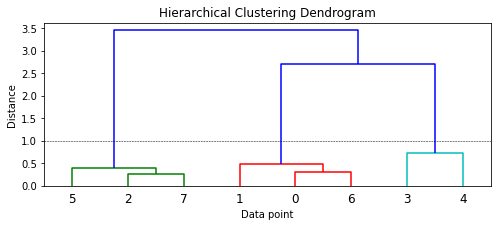

In [155]:
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0, c='k', ls='--', lw=0.5)

In [156]:
from scipy.cluster.hierarchy import fcluster
max_dist = 1.0
cluster_labels = fcluster(Z, max_dist, criterion='distance')
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,2
1,Love this blue and beautiful sky!,weather,2
2,The quick brown fox jumps over the lazy dog.,animals,1
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food,3
4,"I love green eggs, ham, sausages and bacon!",food,3
5,The brown fox is quick and the blue dog is lazy!,animals,1
6,The sky is very blue and the sky is very beautiful today,weather,2
7,The dog is lazy but the brown fox is quick!,animals,1


## Topic Models

In [157]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=3, max_iter=10000, random_state=0)
dt_matrix = lda.fit_transform(cv_matrix)
features = pd.DataFrame(dt_matrix, columns=['T1', 'T2', 'T3'])
features

,T1,T2,T3
0,0.832191,0.083480,0.084329
1,0.863554,0.069100,0.067346
2,0.047794,0.047776,0.904430
3,0.037243,0.925559,0.037198
4,0.049121,0.903076,0.047802
5,0.054902,0.047778,0.897321
6,0.888287,0.055697,0.056016
7,0.055704,0.055689,0.888607


In [158]:
tt_matrix = lda.components_
for topic_weights in tt_matrix:
    topic = [(token, weight) for token, weight in zip(vocab, topic_weights)]
    topic = sorted(topic, key=lambda x: -x[1])
    topic = [item for item in topic if item[1] > 0.6]
    print(topic)

[('sky', 4.332439442470133), ('blue', 3.373774254787669), ('beautiful', 3.3323650509884386), ('today', 1.3325579855138987), ('love', 1.330415818217548)]
[('bacon', 2.33269586574902), ('eggs', 2.33269586574902), ('ham', 2.33269586574902), ('sausages', 2.33269586574902), ('love', 1.3354610533796558), ('beans', 1.3327735190105536), ('breakfast', 1.3327735190105536), ('kings', 1.3327735190105536), ('toast', 1.3327735190105536), ('green', 1.3325431515674175)]
[('brown', 3.3323473548404405), ('dog', 3.3323473548404405), ('fox', 3.3323473548404405), ('lazy', 3.3323473548404405), ('quick', 3.3323473548404405), ('jumps', 1.3324193772908193), ('blue', 1.2919423137963386)]


# word embeddings

In [159]:
from nltk.corpus import gutenberg
from string import punctuation
bible = gutenberg.sents('bible-kjv.txt')
remove_terms = punctuation + '0123456789'
norm_bible = [[word.lower() for word in sent if word not in remove_terms]
for sent in bible]
norm_bible = [' '.join(tok_sent) for tok_sent in norm_bible]
norm_bible = filter(None, normalize_corpus(norm_bible))
norm_bible = [tok_sent for tok_sent in norm_bible if len(tok_sent.split()) > 2]
print('Total lines:', len(bible))
print('\nSample line:', bible[10])
print('\nProcessed line:', norm_bible[10])

Total lines: 30103

Sample line: ['1', ':', '6', 'And', 'God', 'said', ',', 'Let', 'there', 'be', 'a', 'firmament', 'in', 'the', 'midst', 'of', 'the', 'waters', ',', 'and', 'let', 'it', 'divide', 'the', 'waters', 'from', 'the', 'waters', '.']

Processed line: god said let firmament midst waters let divide waters waters


# Word2Vec Models
## Continuous Bag of Words (CBOW) Model

In [160]:
from keras.preprocessing import text
from keras.utils import np_utils
from keras.preprocessing import sequence
tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(norm_bible)
word2id = tokenizer.word_index
# build vocabulary of unique words
word2id['PAD'] = 0
id2word = {v:k for k, v in word2id.items()}
wids = [[word2id[w] for w in text.text_to_word_sequence(doc)] for doc in
norm_bible]
vocab_size = len(word2id)
embed_size = 100
window_size = 2 # context window size

In [161]:
print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:10])

Vocabulary Size: 12425
Vocabulary Sample: [('shall', 1), ('unto', 2), ('lord', 3), ('thou', 4), ('thy', 5), ('god', 6), ('ye', 7), ('said', 8), ('thee', 9), ('upon', 10)]


In [162]:
def generate_context_word_pairs(corpus, window_size, vocab_size):
    context_length = window_size*2
    for words in corpus:
        sentence_length = len(words)
        for index, word in enumerate(words):
            context_words = []
            label_word   = []
            start = index - window_size
            end = index + window_size + 1
            context_words.append([words[i]
                                 for i in range(start, end)
                                 if 0 <= i < sentence_length
                                 and i != index])
            label_word.append(word)
            x = sequence.pad_sequences(context_words, maxlen=context_length)
            y = np_utils.to_categorical(label_word, vocab_size)
            yield (x, y)

In [163]:
# Test this out for some samples
i = 0
for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
    if 0 not in x[0]:
        print('Context (X):', [id2word[w] for w in x[0]], '-> Target (Y):',
                  id2word[np.argwhere(y[0])[0][0]])
        if i == 10:
            break
        i += 1

Context (X): ['old', 'testament', 'james', 'bible'] -> Target (Y): king
Context (X): ['first', 'book', 'called', 'genesis'] -> Target (Y): moses
Context (X): ['beginning', 'god', 'heaven', 'earth'] -> Target (Y): created
Context (X): ['earth', 'without', 'void', 'darkness'] -> Target (Y): form
Context (X): ['without', 'form', 'darkness', 'upon'] -> Target (Y): void
Context (X): ['form', 'void', 'upon', 'face'] -> Target (Y): darkness
Context (X): ['void', 'darkness', 'face', 'deep'] -> Target (Y): upon
Context (X): ['spirit', 'god', 'upon', 'face'] -> Target (Y): moved
Context (X): ['god', 'moved', 'face', 'waters'] -> Target (Y): upon
Context (X): ['god', 'said', 'light', 'light'] -> Target (Y): let
Context (X): ['god', 'saw', 'good', 'god'] -> Target (Y): light


In [164]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda
# build CBOW architecture
cbow = Sequential()
cbow.add(Embedding(input_dim=vocab_size, output_dim=embed_size, input_length=window_size*2))
cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(embed_size,)))
cbow.add(Dense(vocab_size, activation='softmax'))
cbow.compile(loss='categorical_crossentropy', optimizer='rmsprop')
# view model summary
print(cbow.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 100)            1242500   
_________________________________________________________________
lambda (Lambda)              (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 12425)             1254925   
Total params: 2,497,425
Trainable params: 2,497,425
Non-trainable params: 0
_________________________________________________________________
None


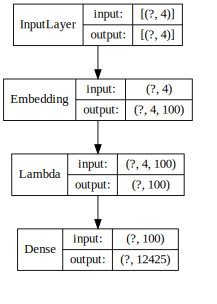

In [165]:
# visualize model structure
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(cbow, show_shapes=True, show_layer_names=False,
                 rankdir='TB', dpi=65).create(prog='dot', format='svg'))

In [191]:
for epoch in range(1, 6):
    loss = 0.
    i = 0
    for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
        i += 1
        loss += cbow.train_on_batch(x, y)
        if i % 10000 == 0:
            print('Processed {} (context, word) pairs'.format(i))
    print('Epoch:', epoch, '\tLoss:', loss)
    print()

KeyboardInterrupt: 

In [ ]:
weights = cbow.get_weights()[0]
weights = weights[1:]
print(weights.shape)
pd.DataFrame(weights, index=list(id2word.values())[1:]).head()

In [1]:
from sklearn.metrics.pairwise import euclidean_distances
# compute pairwise distance matrix
distance_matrix = euclidean_distances(weights)
print(distance_matrix.shape)
# view contextually similar words
similar_words = {search_term: [id2word[idx] for idx in distance_matrix[word2id[search_term]-1].argsort()[1:6]+1] for search_term in [
    'god', 'jesus', 'noah', 'egypt',
    'john', 'gospel', 'moses','famine']}
similar_words

NameError: name 'weights' is not defined

## The Skip-Gram Model

In [183]:
from keras.preprocessing import text
tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(norm_bible)
word2id = tokenizer.word_index
id2word = {v:k for k, v in word2id.items()}
vocab_size = len(word2id) + 1
embed_size = 100
wids = [[word2id[w] for w in text.text_to_word_sequence(doc)] for doc in norm_bible]
print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:10])

Vocabulary Size: 12425
Vocabulary Sample: [('shall', 1), ('unto', 2), ('lord', 3), ('thou', 4), ('thy', 5), ('god', 6), ('ye', 7), ('said', 8), ('thee', 9), ('upon', 10)]


In [184]:
from keras.preprocessing.sequence import skipgrams
# generate skip-grams
skip_grams = [skipgrams(wid, vocabulary_size=vocab_size, window_size=10) for wid in wids]
# view sample skip-grams
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(10):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
        id2word[pairs[i][0]], pairs[i][0],
        id2word[pairs[i][1]], pairs[i][1],
        labels[i]))

(king (13), robbeth (10657)) -> 0
(king (13), bible (5766)) -> 1
(james (1154), king (13)) -> 1
(james (1154), coasts (1065)) -> 0
(king (13), james (1154)) -> 1
(james (1154), bible (5766)) -> 1
(bible (5766), king (13)) -> 1
(james (1154), overflow (2857)) -> 0
(bible (5766), moveable (10583)) -> 0
(king (13), puffed (4646)) -> 0


Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
embedding_3_input (InputLayer)  [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_4_input (InputLayer)  [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 1, 100)       1242500     embedding_3_input[0][0]          
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 1, 100)       1242500     embedding_4_input[0][0]          
_______________________________________________________________________________________

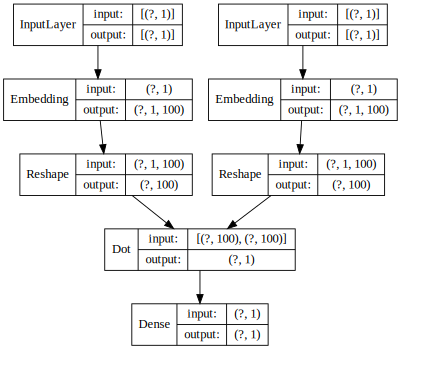

In [186]:
from keras.layers import Dot
from keras.layers.core import Dense, Reshape
from keras.layers.embeddings import Embedding
from keras.models import Sequential
from keras.models import Model


# build skip-gram architecture
word_model = Sequential()
word_model.add(Embedding(vocab_size, embed_size, embeddings_initializer="glorot_uniform", input_length=1))
word_model.add(Reshape((embed_size, )))
context_model = Sequential()
context_model.add(Embedding(vocab_size, embed_size,
                  embeddings_initializer="glorot_uniform",
                  input_length=1))
context_model.add(Reshape((embed_size,)))
model_arch = Dot(axes=1)([word_model.output, context_model.output])
model_arch = Dense(1, kernel_initializer="glorot_uniform",
                activation="sigmoid")(model_arch)
model = Model([word_model.input,context_model.input], model_arch)
model.compile(loss="mean_squared_error", optimizer="rmsprop")
# view model summary
print(model.summary())
# visualize model structure
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model, show_shapes=True, show_layer_names=False,
                 rankdir='TB', dpi=65).create(prog='dot', format='svg'))

In [187]:
for epoch in range(1, 6):
    loss = 0
    for i, elem in enumerate(skip_grams):
        pair_first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        pair_second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [pair_first_elem, pair_second_elem]
        Y = labels
        if i % 10000 == 0:
            print('Processed {} (skip_first, skip_second, relevance) pairs'.format(i))
        loss += model.train_on_batch(X,Y)
    print('Epoch:', epoch, 'Loss:', loss)

Processed 0 (skip_first, skip_second, relevance) pairs
Processed 10000 (skip_first, skip_second, relevance) pairs
Processed 20000 (skip_first, skip_second, relevance) pairs
Epoch: 1 Loss: 4521.3948340993375
Processed 0 (skip_first, skip_second, relevance) pairs
Processed 10000 (skip_first, skip_second, relevance) pairs
Processed 20000 (skip_first, skip_second, relevance) pairs
Epoch: 2 Loss: 3770.522037959425
Processed 0 (skip_first, skip_second, relevance) pairs
Processed 10000 (skip_first, skip_second, relevance) pairs
Processed 20000 (skip_first, skip_second, relevance) pairs
Epoch: 3 Loss: 3761.2941231961886
Processed 0 (skip_first, skip_second, relevance) pairs
Processed 10000 (skip_first, skip_second, relevance) pairs
Processed 20000 (skip_first, skip_second, relevance) pairs
Epoch: 4 Loss: 3803.5684641709668
Processed 0 (skip_first, skip_second, relevance) pairs
Processed 10000 (skip_first, skip_second, relevance) pairs
Processed 20000 (skip_first, skip_second, relevance) pairs


In [188]:
word_embed_layer = model.layers[2]
weights = word_embed_layer.get_weights()[0][1:]
print(weights.shape)
pd.DataFrame(weights, index=id2word.values()).head()

(12424, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
shall,0.023009,-0.025797,0.085465,-0.043689,0.023867,0.044870,0.018939,-0.004320,0.152875,-0.040359,...,0.071675,-0.023767,0.062889,0.048915,0.106133,-0.202143,0.017319,0.028540,0.032405,0.030626
unto,0.010529,0.112038,-0.106333,-0.164355,0.095477,0.003055,-0.005277,0.025439,0.012029,-0.277483,...,0.113940,-0.059970,0.049712,0.000654,0.129238,-0.009142,0.066729,0.019928,-0.051724,0.026641
lord,0.076149,-0.122772,0.119208,-0.208132,0.049361,-0.024588,-0.068129,0.037290,-0.048044,-0.064005,...,-0.014093,0.010464,0.129864,0.314389,0.079635,0.065795,0.228652,0.012744,0.023346,-0.042509
thou,0.016977,0.049877,0.011574,-0.071939,0.046227,0.027916,0.085344,-0.068320,0.126114,-0.090789,...,0.129214,-0.024975,0.440548,0.106319,0.087941,0.031200,0.144303,-0.037624,-0.150904,0.064965
thy,-0.002531,-0.002730,0.000153,0.044314,0.127006,-0.054440,-0.066969,0.084168,0.113734,-0.101245,...,0.101675,-0.072124,0.329426,0.137690,0.010845,-0.065254,0.076066,0.169786,0.091466,0.128879


In [189]:
from sklearn.metrics.pairwise import euclidean_distances
distance_matrix = euclidean_distances(weights)
print(distance_matrix.shape)
similar_words = {search_term: [id2word[idx] for idx in distance_matrix[word2id[search_term]-1].argsort()[1:6]+1] for search_term in ['god', 'jesus', 'noah', 'egypt', 'john', 'gospel', 'moses','famine']}

(12424, 12424)


In [190]:
similar_words

{'god': ['jacob', 'love', 'law', 'mercy', 'spirit'],
 'jesus': ['christ', 'many', 'disciples', 'yet', 'would'],
 'noah': ['abinadab', 'terah', 'japheth', 'lamech', 'wealthy'],
 'egypt': ['places', 'midst', 'gods', 'hosts', 'desolate'],
 'john': ['woe', 'master', 'church', 'asked', 'fulfilled'],
 'gospel': ['grace', 'whatsoever', 'ghost', 'whosoever', 'witness'],
 'moses': ['inheritance', 'commanded', 'congregation', 'near', 'aaron'],
 'famine': ['transgressions', 'burned', 'pestilence', 'testify', 'rod']}

Total words: 48 	Word Embedding shapes: (48, 100)


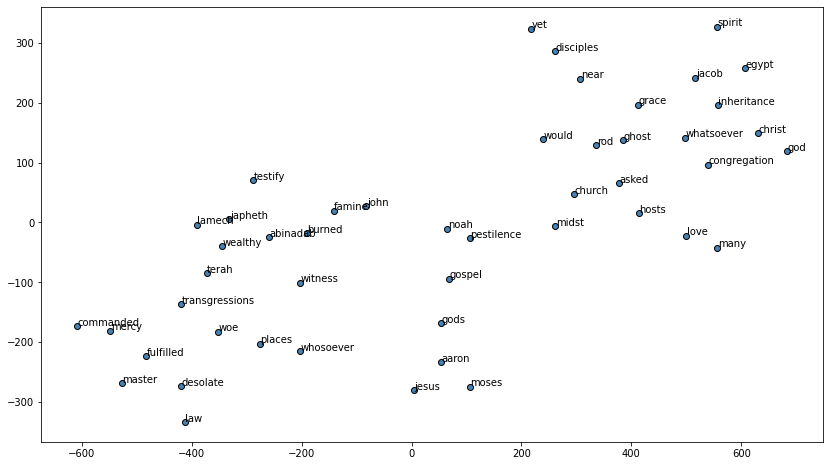

In [191]:
from sklearn.manifold import TSNE
words = sum([[k] + v for k, v in similar_words.items()], [])
words_ids = [word2id[w] for w in words]
word_vectors = np.array([weights[idx] for idx in words_ids])
print('Total words:', len(words), '\tWord Embedding shapes:', word_vectors.shape)
tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_vectors)
labels = words
plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='steelblue', edgecolors='k')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [192]:
!pip install gensim

     |████████████████████████████████| 24.2 MB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 111 kB 3.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 5.8 MB/s eta 0:00:01
     |████████████████████████████████| 129 kB 6.7 MB/s eta 0:00:01
     |████████████████████████████████| 6.6 MB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 69 kB 3.5 MB/s eta 0:00:011
     |████████████████████████████████| 547 kB 5.5 MB/s eta 0:00:01
  Created wheel for smart-open: filename=smart_open-2.1.1-py3-none-any.whl size=112413 sha256=4d237f04b929fae490a10d588532d36aae28cbe3fafb12ee1761192dc25cc728
  Stored in directory: /home/adanik/.cache/pip/wheels/75/81/f7/25ad503e6a6a4bd757502b7b8329da19f9ecdbba5965de36c8
Successfully built smart-open


In [193]:
from gensim.models import word2vec
# tokenize sentences in corpus
wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in norm_bible]
# Set values for various parameters
feature_size = 100    # Word vector dimensionality
window_context = 30          # Context window size
min_word_count = 1   # Minimum word count
sample = 1e-3   # Downsample setting for frequent words
w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size,
                          window=window_context, min_count=min_word_count,
                          sample=sample, iter=50)
# view similar words based on gensim's model
similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term],
                                                                             topn=5)] for search_term in [
    'god', 'jesus', 'noah', 'egypt', 'john', 'gospel', 'moses','famine']}
similar_words

{'god': ['lord', 'worldly', 'godly', 'saviour', 'reasonable'],
 'jesus': ['peter', 'messias', 'synagogue', 'nathanael', 'apostles'],
 'noah': ['shem', 'japheth', 'ham', 'kenan', 'henoch'],
 'egypt': ['egyptians', 'pharaoh', 'bondage', 'rid', 'flowing'],
 'john': ['baptist', 'james', 'peter', 'galilee', 'devine'],
 'gospel': ['christ', 'faith', 'godly', 'persecutions', 'repentance'],
 'moses': ['joshua', 'congregation', 'children', 'elisheba', 'doctor'],
 'famine': ['pestilence', 'sword', 'blasting', 'mildew', 'overtaketh']}

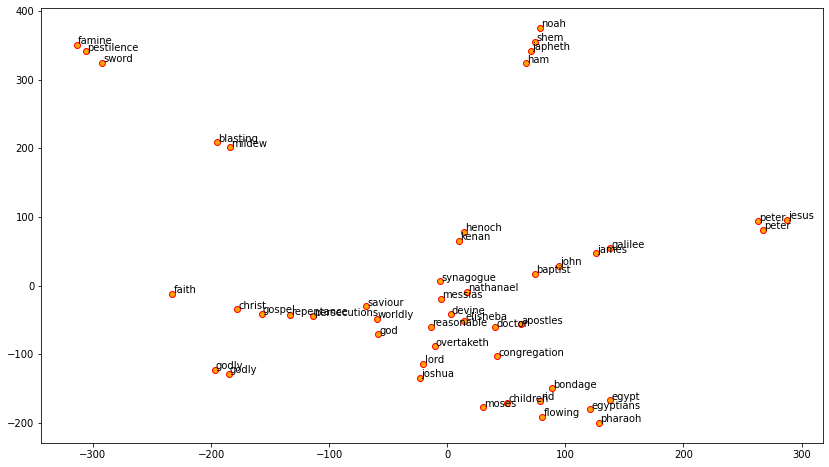

In [194]:
from sklearn.manifold import TSNE
words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = w2v_model.wv[words]
tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words
plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [195]:
# build word2vec model
wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in norm_corpus]
# Set values for various parameters
feature_size = 10    # Word vector dimensionality
window_context = 10          # Context window size
min_word_count = 1   # Minimum word count
sample = 1e-3   # Downsample setting for frequent words

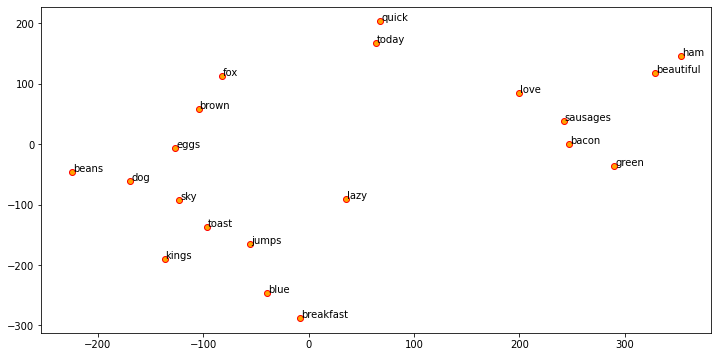

In [196]:
w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size,
                              window=window_context, min_count = min_word_count, sample=sample, iter=100)
# visualize embeddings
from sklearn.manifold import TSNE
words = w2v_model.wv.index2word
wvs = w2v_model.wv[words]
tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words
plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [197]:
def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    for word in words:
        if word in vocabulary:
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model[word])
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
    return feature_vector
def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features) for tokenized_sentence in corpus]
    return np.array(features)

In [198]:
# get document level embeddings
w2v_feature_array = averaged_word_vectorizer(corpus=tokenized_corpus,model=w2v_model, num_features=feature_size)
pd.DataFrame(w2v_feature_array)

<ipython-input-197-d9b4dac4ccca>:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  feature_vector = np.add(feature_vector, model[word])


,0,1,2,3,4,5,6,7,8,9
0,-0.007928,-0.006512,0.010100,-0.026791,0.021599,0.015697,-0.007866,-0.009517,0.001981,-0.018623
1,-0.006578,0.000612,0.017529,-0.020928,0.005687,0.014299,-0.004909,-0.014346,-0.008736,-0.011725
2,0.023723,0.010523,0.021095,0.000691,0.015908,-0.012545,0.017958,0.000529,0.016482,0.001940
3,-0.008276,-0.004698,0.011595,-0.012402,-0.002708,0.007879,0.001734,-0.000952,0.000963,-0.010106
4,-0.017611,0.011553,-0.003151,-0.006261,-0.017878,-0.000376,-0.010294,-0.006658,-0.026496,-0.002621
5,0.030275,0.006964,0.012078,-0.000499,0.017604,-0.016343,0.007706,-0.004866,0.014537,0.002550
6,-0.005784,0.002356,0.013018,-0.018584,0.013102,0.000730,-0.012432,-0.018710,0.001216,-0.015835
7,0.030096,0.010404,0.019634,0.007363,0.020445,-0.023413,0.011497,-0.007307,0.009957,0.010782


In [199]:
from sklearn.cluster import AffinityPropagation
ap = AffinityPropagation()
ap.fit(w2v_feature_array)
cluster_labels = ap.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

/home/adanik/adanik/myvenv/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,0
1,Love this blue and beautiful sky!,weather,0
2,The quick brown fox jumps over the lazy dog.,animals,1
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food,0
4,"I love green eggs, ham, sausages and bacon!",food,0
5,The brown fox is quick and the blue dog is lazy!,animals,1
6,The sky is very blue and the sky is very beautiful today,weather,0
7,The dog is lazy but the brown fox is quick!,animals,1


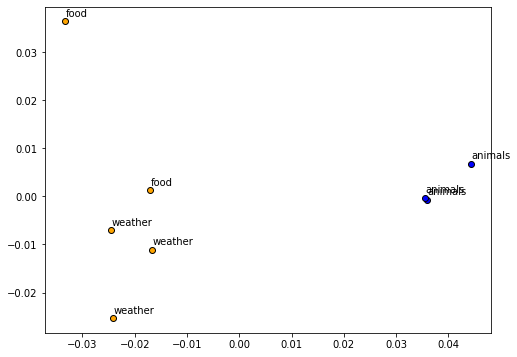

In [200]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0)
pcs = pca.fit_transform(w2v_feature_array)
labels = ap.labels_
categories = list(corpus_df['Category'])
plt.figure(figsize=(8, 6))
for i in range(len(labels)):
    label = labels[i]
    color = 'orange' if label == 0 else 'blue' if label == 1 else 'green'
    annotation_label = categories[i]
    x, y = pcs[i]
    plt.scatter(x, y, c=color, edgecolors='k')
    plt.annotate(annotation_label, xy=(x+1e-4, y+1e-3), xytext=(0, 0),
                 textcoords='offset points')

## The GloVe Model

In [166]:
import spacy
nlp = spacy.load('en_vectors_web_lg')
total_vectors = len(nlp.vocab.vectors)
print('Total word vectors:', total_vectors)

Total word vectors: 1070971


In [167]:
unique_words = list(set([word for sublist in [doc.split() for doc in norm_corpus] for word in sublist]))
word_glove_vectors = np.array([nlp(word).vector for word in unique_words])
pd.DataFrame(word_glove_vectors, index=unique_words)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
lazy,-0.353320,-0.299710,-0.176230,-0.321940,-0.385640,0.586110,0.411160,-0.418680,0.073093,1.486500,...,0.402310,-0.038554,-0.288670,-0.244130,0.460990,0.514170,0.136260,0.344190,-0.845300,-0.077383
ham,-0.773320,-0.282540,0.580760,0.841480,0.258540,0.585210,-0.021890,-0.463680,0.139070,0.658720,...,0.464470,0.481400,-0.829200,0.354910,0.224530,-0.493920,0.456930,-0.649100,-0.131930,0.372040
today,-0.156570,0.594890,-0.031445,-0.077586,0.278630,-0.509210,-0.066350,-0.081890,-0.047986,2.803600,...,-0.326580,-0.413380,0.367910,-0.262630,-0.203690,-0.296560,-0.014873,-0.250060,-0.115940,0.083741
green,-0.072368,0.233200,0.137260,-0.156630,0.248440,0.349870,-0.241700,-0.091426,-0.530150,1.341300,...,-0.405170,0.243570,0.437300,-0.461520,-0.352710,0.336250,0.069899,-0.111550,0.532930,0.712680
blue,0.129450,0.036518,0.032298,-0.060034,0.399840,-0.103020,-0.507880,0.076630,-0.422920,0.815730,...,-0.501280,0.169010,0.548250,-0.319380,-0.072887,0.382950,0.237410,0.052289,0.182060,0.412640
toast,0.130740,-0.193730,0.253270,0.090102,-0.272580,-0.030571,0.096945,-0.115060,0.484000,0.848380,...,0.142080,0.481910,0.045167,0.057151,-0.149520,-0.495130,-0.086677,-0.569040,-0.359290,0.097443
bacon,-0.430730,-0.016025,0.484620,0.101390,-0.299200,0.761820,-0.353130,-0.325290,0.156730,0.873210,...,0.304240,0.413440,-0.540730,-0.035930,-0.429450,-0.246590,0.161490,-1.065400,-0.244940,0.269540
quick,-0.445630,0.191510,-0.249210,0.465900,0.161950,0.212780,-0.046480,0.021170,0.417660,1.686900,...,-0.329460,0.421860,-0.039543,0.150180,0.338220,0.049554,0.149420,-0.038789,-0.019069,0.348650
kings,0.259230,-0.854690,0.360010,-0.642000,0.568530,-0.321420,0.173250,0.133030,-0.089720,1.528600,...,-0.470090,0.063743,-0.545210,-0.192310,-0.301020,1.068500,0.231160,-0.147330,0.662490,-0.577420
dog,-0.057120,0.052685,0.003026,-0.048517,0.007043,0.041856,-0.024704,-0.039783,0.009614,0.308416,...,0.003257,-0.036864,-0.043878,0.000249,-0.026959,0.077895,0.044350,0.035107,0.042551,-0.010643


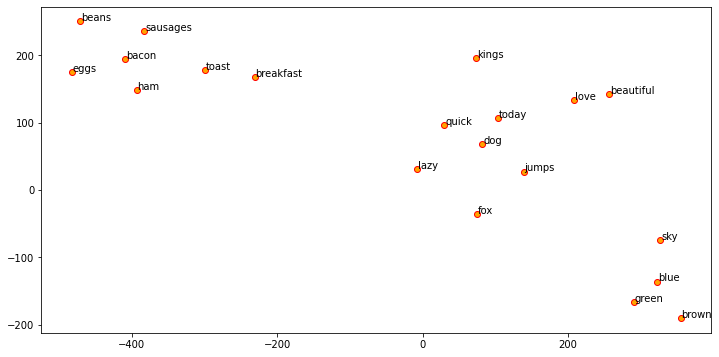

In [168]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_glove_vectors)
labels = unique_words
plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [170]:
from sklearn.cluster import KMeans
doc_glove_vectors = np.array([nlp(str(doc)).vector for doc in norm_corpus])
km = KMeans(n_clusters=3, random_state=0)
km.fit_transform(doc_glove_vectors)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,1
1,Love this blue and beautiful sky!,weather,1
2,The quick brown fox jumps over the lazy dog.,animals,2
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food,0
4,"I love green eggs, ham, sausages and bacon!",food,0
5,The brown fox is quick and the blue dog is lazy!,animals,2
6,The sky is very blue and the sky is very beautiful today,weather,1
7,The dog is lazy but the brown fox is quick!,animals,2


## FastText

In [171]:
from gensim.models.fasttext import FastText
wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in norm_bible]

In [172]:
# Set values for various parameters
feature_size = 100    # Word vector dimensionality
window_context = 50          # Context window size
min_word_count = 5   # Minimum word count
sample = 1e-3   # Downsample setting for frequent words
# sg decides whether to use the skip-gram model (1) or CBOW (0)
ft_model = FastText(tokenized_corpus, size=feature_size, window=window_context, min_count=min_word_count,sample=sample, sg=1, iter=50)
# view similar words based on gensim's FastText model
similar_words = {search_term: [item[0] for item in ft_model.wv.most_similar([
    search_term], topn=5)] for search_term in [
    'god', 'jesus', 'noah','egypt',
    'john', 'gospel', 'moses','famine']}
similar_words

{'god': ['lord', 'therefore', 'unto', 'jesus', 'christ'],
 'jesus': ['christ', 'god', 'disciples', 'faith', 'grace'],
 'noah': ['shem', 'methuselah', 'milcah', 'adam', 'mahalaleel'],
 'egypt': ['land', 'pharaoh', 'egyptians', 'israel', 'shur'],
 'john': ['baptist', 'baptize', 'peter', 'baptized', 'galilee'],
 'gospel': ['preached', 'preach', 'christ', 'preaching', 'grace'],
 'moses': ['aaron', 'commanded', 'congregation', 'spake', 'israel'],
 'famine': ['pestilence', 'sword', 'dearth', 'sojourn', 'mildew']}

In [173]:
print(ft_model.wv.similarity(w1='god', w2='satan'))
print(ft_model.wv.similarity(w1='god', w2='jesus'))

0.34429812
0.6709114


In [174]:
st1 = "god jesus satan john"
print('Odd one out for [',st1, ']:', ft_model.wv.doesnt_match(st1.split()))
st2 = "john peter james judas"
print('Odd one out for [',st2, ']:', ft_model.wv.doesnt_match(st2.split()))

Odd one out for [ god jesus satan john ]: satan
Odd one out for [ john peter james judas ]: judas


/home/adanik/adanik/myvenv/lib/python3.8/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


# Text Classification